In [1]:
%load_ext autoreload
%autoreload 2
from Code import utilities as ut
from Code import cycleGAN as model
from tensorflow.keras.models import load_model
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt

In [2]:
#user input
input_shape = (128, 128, 1)
batch_size = 5 #32
n_epoch = 200 #1
n_filters = 8 #8
comment = ''
saveModel = 'B' + str(batch_size) + '_FS' + str(n_filters) + '_E' + str(n_epoch) + comment #name of the saved model

In [3]:
#loading dataset, saved generative model, and respective loss
loaded_dF_model = load_model('./models/cycleGAN/' + saveModel +'/dF' '.h5')
loaded_dG_model = load_model('./models/cycleGAN/' + saveModel +'/dG' '.h5')
loaded_F_model = load_model('./models/cycleGAN/' + saveModel +'/F' '.h5')
loaded_G_model = load_model('./models/cycleGAN/' + saveModel +'/G' '.h5')
loaded_GtoF_model = load_model('./models/cycleGAN/' + saveModel +'/GtoF' '.h5')
loaded_FtoG_model = load_model('./models/cycleGAN/' + saveModel +'/FtoG' '.h5')
loaded_loss = np.load('./models/cycleGAN/' + saveModel + '/loss' '.npy')
data = np.load('train_set_marm_100-30.npy')   
#Processing
focused, defocused = ut.dataProcess(data)     #process dataset
m = model.cycleGAN(input_shape, n_filters)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
input_real shape:  (1800, 128, 128, 1)
input_cond shape:  (1800, 128, 128, 1)


In [ ]:
#Data inspection: plot processed dataset (focused and defocused)
#ut.plotInput(focused,defocused)

In [ ]:
#Data inspection: plot processed dataset (focused and defocused)
#ut.plotGen(defocused,5)

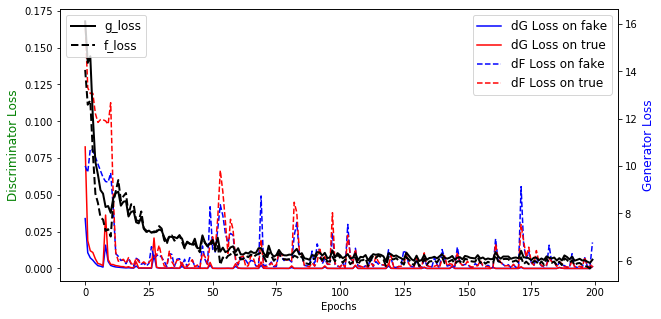

In [10]:
#Plot trained model loss
ut.plotLossCycleGAN(loaded_loss,0)
#plot two scales in one plot? or two subplots?

In [4]:
y_fake_G = loaded_G_model.predict(defocused[0:10])
y_fake_F = loaded_F_model.predict(focused[0:10])

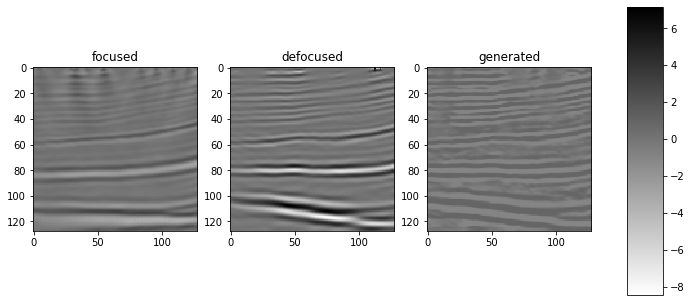

In [9]:
#Plot trained model loss
ut.plotCompareOne(defocused, y_fake_G, focused)

In [ ]:
#Plot trained model loss
ut.plotCompareOne(defocused, y_fake_F, focused)

In [ ]:
loaded_dG_model.summary()

In [ ]:
d = loaded_dG_model.predict(y_fake_G)

In [ ]:
d.shape

In [ ]:
idx = randint(0,d.shape[0])
plt.imshow(d[idx,:,:,0]); plt.colorbar()